In [1]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols,init_printing
from sympy.algebras.quaternion import Quaternion
import numpy as np
init_printing() # Para visualizar simbolos

## 2.1 Representacion de la orientacion de cuerpos

## 2.1.1 Matrices de rotacion

In [ ]:
q1,q2=dynamicsymbols('q1,q2')
a=ReferenceFrame('A')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,e.z))

r1,r2,r3=symbols('r1,r2,r3')
r=r1*b.x+r2*b.y+r3*b.z
# Se define r por sus componentes en b
r

In [ ]:
# Recuerde que puede obtener las matrices de cosenos directores con el metodo dcm
# Por ejemplo ^A R^b
a.dcm(b) 

In [ ]:
# ^A R^e
a.dcm(e)

In [ ]:
# Ahora calcule el producto de las dos rotaciones
a.dcm(e)*e.dcm(b)

In [ ]:
# Obteniendo el mismo resultado con
a.dcm(b)

In [ ]:
# Con el sistema simbolico puede verificar la igualdad de dos expresiones
a.dcm(e)*e.dcm(b)==a.dcm(b)

In [ ]:
# Observe que el producto no es conmutativo
e.dcm(b)*a.dcm(e)==a.dcm(b)

## Angulos de Euler

In [ ]:
a=ReferenceFrame('A')
phi,theta,psi=symbols('phi,theta,psi')
# Defina el marco de referencia D con rotaciones sucesivas XYZ
d=a.orientnew('D','Body',(phi,theta,psi),'XYZ')
# Esto es equivalente a tres rotaciones con marcos intermedios
e1=a.orientnew('E1','Axis',(phi,a.x))
e2=e1.orientnew('E2','Axis',(theta,e1.y))
e3=e2.orientnew('E3','Axis',(psi,e2.z))

print('rotx (^AR^E1):')
pprint(a.dcm(e1))
print('roty (^E1R^E2):')
pprint(e1.dcm(e2))
print('rotz (^E2R^E3):')
pprint(e2.dcm(e3))

In [ ]:
#El producto de estas rotaciones corresponde a ^AR^D
a.dcm(e1)*e1.dcm(e2)*e2.dcm(e3)
#a.dcm(e3)

## 2.1.3 Rotaciones respecto a ejes fijos

In [ ]:
a=ReferenceFrame('A')
phi,theta,psi=symbols('phi,theta,psi')
# Defina el marco de referencia D con rotaciones en ejes fijos
# En el orden psi (en ax), theta (en ay), phi (en az)
b=a.orientnew('B','Space',(psi,theta,phi),'XYZ')
a.dcm(b)

## 2.1.4 Representacion eje-angulo

In [ ]:
a=ReferenceFrame('A')
phi,nx,ny,nz=symbols('Phi,nx,ny,nz')
# Defina el vector n con componentes en A
n=nx*a.x+ny*a.y+nz*a.z
b=a.orientnew('B','Axis',(phi,n))
# Se utiliza el metodo subs para sustituir la norma L2 del vector como unitaria.
a.dcm(b).simplify().subs(nx**2+ny**2+nz**2,1)

## 2.1.5 Representacion usando cuaterniones

In [ ]:
a=ReferenceFrame('A')
e0,e1,e2,e3=symbols('e0,e1,e2,e3')
b=a.orientnew('B','quaternion',(e0,e1,e2,e3))
a.dcm(b)

In [ ]:
#Puede aplicar rotaciones sucesivas con cuaterniones
# usando la clase Quaternion
a1,a2,b1,b2,c1,c2,d1,d2=symbols('a1,a2,b1,b2,c1,c2,d1,d2')
# Defina los cuaterniones q1 y q2
q1=Quaternion(a1,b1,c1,d1)
q2=Quaternion(a2,b2,c2,d2)
# q3 producto de q1*q2
q3=q1*q2

# Defina el marco B con q3
b=a.orientnew('B','quaternion',q3.args)

# Alternativamente puede definir los marcos E1 y E2 con q1 y q2 respectivamente
e1=a.orientnew('E1','quaternion',q1.args)
e2=e1.orientnew('E2','quaternion',q2.args)

# Observe que el resultado es el mismo
a.dcm(e2).expand()==a.dcm(b).expand()

## 2.2 Velocidad angular

In [ ]:
q1,q2=dynamicsymbols('q1,q2')
a=ReferenceFrame('A')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,-e.z))
# Puede calcular la velocidad angular de B respecto a A 
# con el metodo ang_vel_in.
b.ang_vel_in(a).express(b)

## 2.3 Velocidad angular y derivadas de vectores

## 2.3.1 Derivada de un vector fijo a un marco

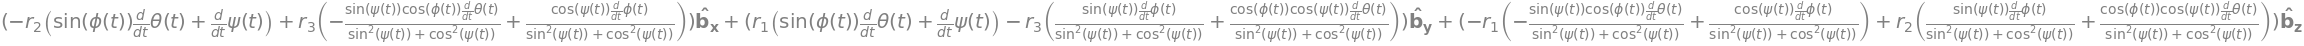

In [7]:
theta,phi,psi=dynamicsymbols('theta,phi,psi')
r1,r2,r3=symbols('r1,r2,r3')
a=ReferenceFrame('A')
b=a.orientnew('B','Body',(theta,phi,psi),'XYZ')
#Defina el vector r
r=r1*b.x+r2*b.y+r3*b.z
# Puede calcular la derivada total del vector r en A
r.dt(a)

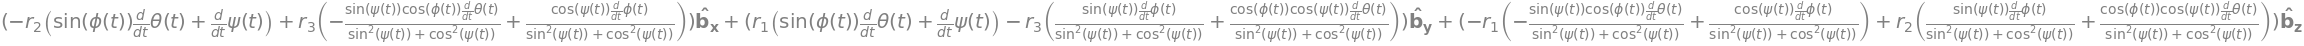

In [4]:
# Para calcular velocidades relativas entre marcos de referencia
# es mas conveniente crear objectos de la clase Point.
# Definiendo O como origen estacionario desde el marco de referencia A
O=Point('O')
O.set_vel(a,0)
# Ahora defina el punto R
r=O.locatenew('R',r1*b.x+r2*b.y+r3*b.z)
# Calcule la velocidad respecto a A
r.vel(a)

## 2.3.2 Relacion entre derivadas en marcos diferentes

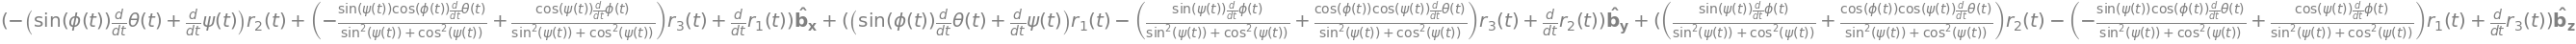

In [6]:
# El punto r podria tener una velocidad diferente a 0
# En este caso definimos las variables r1,r2,r3 como simbolos dinamicos
# (i.e. r1(t),r2(t),r3(t))
r1,r2,r3=dynamicsymbols('r1,r2,r3')
theta,phi,psi=dynamicsymbols('theta,phi,psi')
a=ReferenceFrame('A')
b=a.orientnew('B','Body',(theta,phi,psi),'XYZ')
O=Point('O')
O.set_vel(a,0)
# Ahora defina el punto R
r=O.locatenew('R',r1*b.x+r2*b.y+r3*b.z)
# Calcule la velocidad respecto a A y observe que aparecen los terminos
# dr_i/dt, que corresponden a la velocidad de r en el marco B.
r.vel(a)

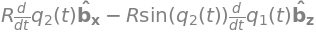

In [13]:
# Aplicando esto para el caso del modelo giro-péndulo
q1,q2=dynamicsymbols('q1,q2')
# Variables de distancia l1: longitud del pendulo, R: radio del disco
l1,R=symbols('l1,R') 

#Defina marcos de referencia
a=ReferenceFrame('A')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,-e.z))

#Defina el punto de origen
O=Point('O')
O.set_vel(a,0)
# Ahora defina el punto Q en el centro del disco
q=O.locatenew('Q',l1*e.z)
# Defina el punto P en la periferia del disco
p=q.locatenew('P',R*b.y)

# Calcule la velocidad del vector w, definido desde Q hasta P. 
w=p.pos_from(q)
w.dt(a)

## 2.4 Velocidad angular simple

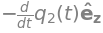

In [18]:
# Para el ejemplo del modelo giro-pendulo observe
# la velocidad angular de E en A y de B en E. 
a=ReferenceFrame('A')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,-e.z))
e.ang_vel_in(a).express(e)
#b.ang_vel_in(e).express(e)

## 2.5 Teorema de adicion de velocidades angulares

In [20]:
# Para el ejemplo del modelo giro-pendulo observe
# la velocidad angular de E en A y de B en E. 
a=ReferenceFrame('A')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,-e.z))
# Observe que la suma de las velocidades angulares corresponde a la velocidad angular
# del cuerpo B en el marco A.
e.ang_vel_in(a).express(e)+b.ang_vel_in(e).express(e)==b.ang_vel_in(a).express(e)

True

## 2.6 Relacion entre la velocidad angular y las representaciones de orientacion

## 2.6.1 Relacion entre la velocidad angular y las representaciones de orientacion

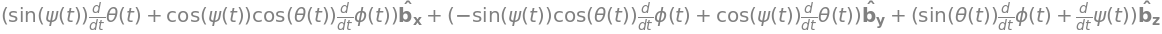

In [28]:
a=ReferenceFrame('A')
phi,theta,psi=dynamicsymbols('phi,theta,psi')
# Defina el marco de referencia B con rotaciones sucesivas XYZ
b=a.orientnew('B','Body',(phi,theta,psi),'XYZ')
b.ang_vel_in(a).simplify()

### 2.6.3 Velocidad angular y parametros de Euler

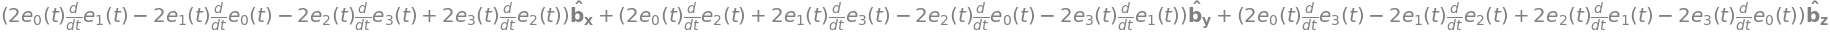

In [40]:
a=ReferenceFrame('A')
e0,e1,e2,e3=dynamicsymbols('e0,e1,e2,e3')
b=a.orientnew('B','quaternion',(e0,e1,e2,e3))
# Calcule la velocidad angular expresada en terminos del cuaternion
# Aqui se obtiene un factor 2 adicional a las expresiones del libro.
# Omega representa la velocidad angular de B en el marco A.
# Y esta rotacion es producida por el doble producto q ⊗ r ⊗ q *. 
# Puede pensar en esto como que el quaternion q captura "media" rotacion.
# Para mas detalles puede consultar el capitulo "Exponential map" en https://arxiv.org/pdf/1711.02508.pdf
b.ang_vel_in(a).simplify()


### 2.7 Aceleracion angular

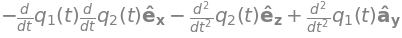

In [41]:
# Para el ejemplo del modelo giro-pendulo observe
# la aceleracion angular de E en A y de B en E. 
a=ReferenceFrame('A')
q1,q2=dynamicsymbols('q1,q2')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,-e.z))

b.ang_acc_in(a)